# Assignment: K Nearest Neighbor-VDM-Logistic Regression
In the first 2 problems, you’ll be applying KNN algorithm to a healthcare data
set. The data files for training and test are named healthcareTrain.csv and
healthcareTest.csv, respectively. You can find the description of each feature in
the DataDictionary file.
Here is a brief description of those features that you’ll be using in this as-
signment:
1. pre-rx-cost: Total pharmacy costs per person
2. numofgen: Number of generic scripts
3. numofbrand: Number of brand scripts
4. generic-cost: Cost of generic scripts filled
5. adjust-total-30d: 30 day adjusted fill rate
6. num-er: Number of ER visits
7. region: US Census Region (1 Northeast, 2 Midwest, 3 South, 4 West)
8. pdc-80-flag: Adherent (A categorical variable that indicates if patients
have adhered to taking their medications more than 80% of the time; =1
if pdc ≥ 0.80; =0 otherwise)

## Problem 1 (20 points)
In this problem you apply built-in KNN package to the healthcare data to
predict adherent class (pdc-80-flag). Use of pipeline is recommended.

1. (10 points) Predict the pdc-80-flag using the following features ”pre-rx-
cost”,”numofgen”,”numofbrand”,”generic-cost”,”adjust-total-30d”, and ”num-
er”. Determine the accuracy rate for test set for k = 75 to 105 with a step
size of 2 and report it in a table. Use linear normalization method to
normalize the input features and Euclidean distance for distance measure.
Note that you must use the training parameters for normalization of test
points.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# We import the datasets
df_HC_train = pd.read_csv('healthcareTrain.csv')
df_HC_test = pd.read_csv('healthcareTest.csv')
# df_HC_train.info()

# We prepare the data
X_train = df_HC_train[["pre_rx_cost", "numofgen", "numofbrand", "generic_cost", "adjust_total_30d", "num_er"]]
X_test = df_HC_test[["pre_rx_cost", "numofgen", "numofbrand", "generic_cost", "adjust_total_30d", "num_er"]]
Y_train = df_HC_train["pdc_80_flag"]
Y_test = df_HC_test["pdc_80_flag"]

# We initialize the MinMaxScaler and then normalize the training and test features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# We implement knn and determine the accuracy rate 
accuracy_results = {}                                                 # Dictionary to store accuracy results
for k in range(75, 106, 2):                                           # Loop for k values from 75 to 105 with a step size of 2
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')     # KNN clasifier with k value
    knn.fit(X_train_normalized, Y_train)                              # Train the model
    Y_pred = knn.predict(X_test_normalized)                           # Predict on the test set
    accuracy = accuracy_score(Y_test, Y_pred)                         # Calculate accuracy
    accuracy_results[k] = accuracy                                    # Store accuracy values in the dictionary

# Print results
print("k\tAccuracy")
for k, accuracy in accuracy_results.items():
    print(f"{k}\t{(accuracy*100):.1f}%")

k	Accuracy
75	66.9%
77	66.6%
79	66.9%
81	66.6%
83	66.3%
85	66.6%
87	66.6%
89	66.6%
91	66.6%
93	65.4%
95	66.0%
97	66.3%
99	66.9%
101	67.2%
103	67.7%
105	66.9%


2. (10 points) Plot the accuracy rate vs. K. Which value of K gives you the
best accuracy rate?

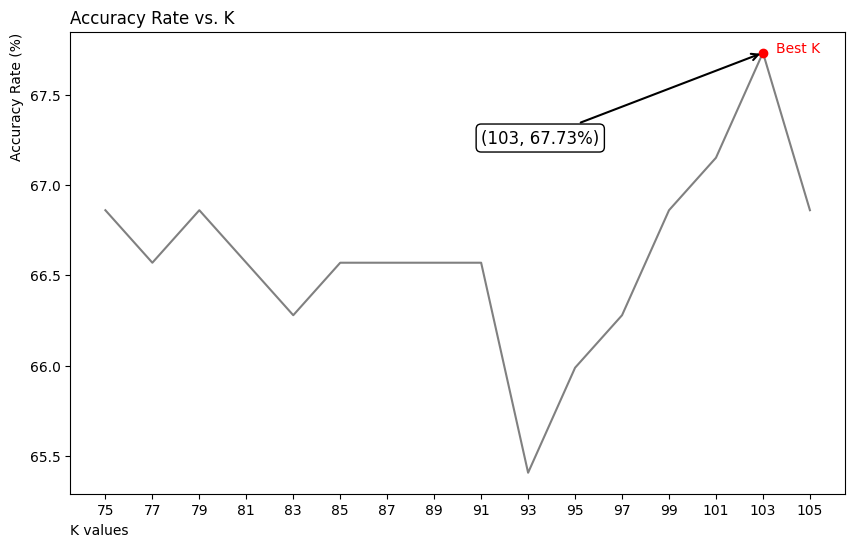

In [16]:
import matplotlib.pyplot as plt

# Extract K values and accuracy rates
k_values = list(accuracy_results.keys())
accuracy_rate = [value * 100 for value in accuracy_results.values()]

# Build the graphic
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracy_rate, linestyle='-', color='grey', label="Accuracy Rate")

# Find best K and best accuracy rate
best_k = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_k] * 100

# Show the point in the graphic
plt.scatter(best_k, best_accuracy, color='red', zorder=3, label=f"Best K = {best_k}")
plt.annotate(f"({best_k}, {best_accuracy:.2f}%)", 
             xy=(best_k, best_accuracy), 
             xytext=(best_k-12, best_accuracy-0.5),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5),
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))
plt.text(best_k+1.5, best_accuracy, "Best K", ha="center", fontsize=10, color="red")

# Graphic design
plt.title("Accuracy Rate vs. K", loc='left')
plt.xlabel("K values", loc='left')
plt.ylabel("Accuracy Rate (%)", loc='top')
plt.xticks(k_values)

plt.show()


## Problem 2 (40 points)
In this problem you’ll continue using the healthcare data from the previous
problem. You’ll use the Value Distance Metric (VDM) to find the distance
between symbolic feature values Northeast, Midwest, South, and West, and
further use this information in KNN algorithm to predict pdc-80-flag. You can
NOT use the built-in packages for this problem.

1. (10 points) Find all the relevant conditional probabilities for finding VDM
for symbolic variable region and report your results in a table.

In [17]:
region_mapping = {1: "Northeast", 2: "Midwest", 3: "South", 4: "West"}

# Dataframe with regions and pdc_80_flag values
df_2_train = df_HC_train[["regionN", "pdc_80_flag"]]
df_2_train = df_2_train.assign(regionN=df_2_train["regionN"].map(region_mapping))

# Total ocurrences for each region
total_counts_regions = df_2_train["regionN"].value_counts().sort_index()
print("Total counts per region:", "\n", total_counts_regions, "\n")

# Total ocurrences of class for each region
class_counts = df_2_train.groupby(["regionN", "pdc_80_flag"]).size().unstack(fill_value=0)
print("Ocurrences of class per region:", "\n", class_counts, "\n")

# Calculate conditional probabilities
conditional_probabilities = class_counts.div(total_counts_regions, axis=0)
print("Conditional probabilities per region and class:", "\n", conditional_probabilities)

Total counts per region: 
 regionN
Midwest      401
Northeast    111
South        774
West          92
Name: count, dtype: int64 

Ocurrences of class per region: 
 pdc_80_flag    0    1
regionN              
Midwest      228  173
Northeast     55   56
South        500  274
West          53   39 

Conditional probabilities per region and class: 
 pdc_80_flag         0         1
regionN                        
Midwest      0.568579  0.431421
Northeast    0.495495  0.504505
South        0.645995  0.354005
West         0.576087  0.423913


2. (10 points) Use results in part 1 to find the distance between symbolic
feature values Northeast, Midwest, South, and West using VDM equation.
Report the distances in a table.

In [18]:
# We identify the regions and build a dataframe to store vdm distances
regions = conditional_probabilities.index
vdm_distances = pd.DataFrame(np.zeros((len(regions), len(regions))), index=regions, columns=regions)

# We calculate vdm distances and store them in the dataframe
for i, region_a in enumerate(regions):
    for j, region_b in enumerate(regions):
        if i<j: # We only need to calculate the upper zone because is a simetric matrix
            vdm_distance = np.sum((conditional_probabilities.loc[region_a]-conditional_probabilities.loc[region_b])**2)
            vdm_distances.loc[region_a, region_b] = vdm_distance
            vdm_distances.loc[region_b, region_a] = vdm_distance

# We print the results
print("VDM distances:", "\n", vdm_distances)


VDM distances: 
 regionN     Midwest  Northeast     South      West
regionN                                           
Midwest    0.000000   0.010682  0.011987  0.000113
Northeast  0.010682   0.000000  0.045300  0.012990
South      0.011987   0.045300  0.000000  0.009774
West       0.000113   0.012990  0.009774  0.000000


3. (10 points) Use this variable (region) in conjunction with the variables
of problem 1 and regenerate your model, for k = 75 to 105 with a step
size of 2. Report the mean accuracy rate. Compare this mean with mean
accuracy rate from previous problem. Has it increased for decreased?

In [19]:
# We set up the data
categorical_features = "regionN"
region_mapping = {1: "Northeast", 2: "Midwest", 3: "South", 4: "West"}
X_train_cat = df_HC_train[categorical_features].map(region_mapping).values    # Values as a numpy array
X_test_cat = df_HC_test[categorical_features].map(region_mapping).values      # Values as a numpy array

numerical_features = ["pre_rx_cost", "numofgen", "numofbrand", "generic_cost", "adjust_total_30d", "num_er"]
X_train_vdm = df_HC_train[numerical_features].values    # Values as a numpy array    
X_test_vdm = df_HC_test[numerical_features].values      # Values as a numpy array

X_train_vdm_norm = (X_train_vdm - X_train_vdm.min())/(X_train_vdm.max()-X_train_vdm.min())    # We manually normalize the numerical data
X_test_vdm_norm = (X_test_vdm - X_train_vdm.min())/(X_train_vdm.max()-X_train_vdm.min())


X_train_vdm = X_train_vdm_norm
X_test_vdm = X_test_vdm_norm
Y_train_vdm = Y_train       # Y_train and Y_test remains the same as in the first problem
Y_test_vdm = Y_test



In [20]:
# We make a function to calculate the new customized distance
def new_distance(X_train_vdm, X_test_vdm, X_train_cat, X_test_cat, vdm_distances):
    # Numerical distance (euclidean):
    num1, num2 = X_train_vdm[:-1], X_test_vdm[:-1]   # THIS IS WRONG, SHOULD BE: X_train_vdm, X_test_vdm
    num_distance = np.sum((num1-num2)**2)

    # Categorical distance:
    reg_a, reg_b = X_train_cat, X_test_cat
    cat_distance = vdm_distances.loc[reg_a, reg_b]

    # Total distance
    tot_distance = np.sqrt(num_distance+cat_distance)

    return tot_distance

In [21]:
# We make a function to perform KNN with the new distance
def knn_with_vdm(X_train_vdm, X_test_vdm, X_train_cat, X_test_cat, Y_train_vdm, k, vdm_distances):
    # We calculate distances between test point and training points
    distances = []
    for i in range(len(X_train_vdm)):
        distance = new_distance(X_train_vdm[i], X_test_vdm, X_train_cat[i], X_test_cat, vdm_distances)
        distances.append((distance, Y_train_vdm[i]))
    
    # We sort the distances using k neighbors
    distances.sort(key=lambda x: x[0])
    knn = distances[:k]

    # We make the prediction using the majority class
    label = [label for _, label in knn]
    prediction = np.argmax(np.bincount(label))

    return prediction

In [22]:
# We perform knn with the numerical and categorical data for k = 75 to 105 with a stepsize of 2.
accuracy_results_vdm = {}

for k in range(75, 106, 2):
    correct_prediction = 0
    for i in range(len(X_test_vdm)):
        prediction = knn_with_vdm(X_train_vdm, X_test_vdm[i], X_train_cat, X_test_cat[i], Y_train_vdm, k, vdm_distances)
        if prediction == Y_test_vdm[i]:
            correct_prediction += 1
    
    accuracy = correct_prediction/len(Y_test_vdm)
    accuracy_results_vdm[k] = accuracy

# We compare means
mean_accuracy_vdm = np.mean(list(accuracy_results_vdm.values()))
print(f"The mean accuracy with VDM is {mean_accuracy_vdm*100:.2f}%")

mean_accuracy_1 = np.mean(list(accuracy_results.values()))
print(f"The mean accuracy of problem 1 is {mean_accuracy_1*100:.2f}%")

if mean_accuracy_vdm > mean_accuracy_1:
    print("The mean accuracy has increased with VDM")
else:
    print("The mean accuracy has decreased with VDM")

The mean accuracy with VDM is 63.75%
The mean accuracy of problem 1 is 66.61%
The mean accuracy has decreased with VDM


4. (5 points) Plot the accuracy rate vs. K. Which value of K gives you the
best accuracy rate?

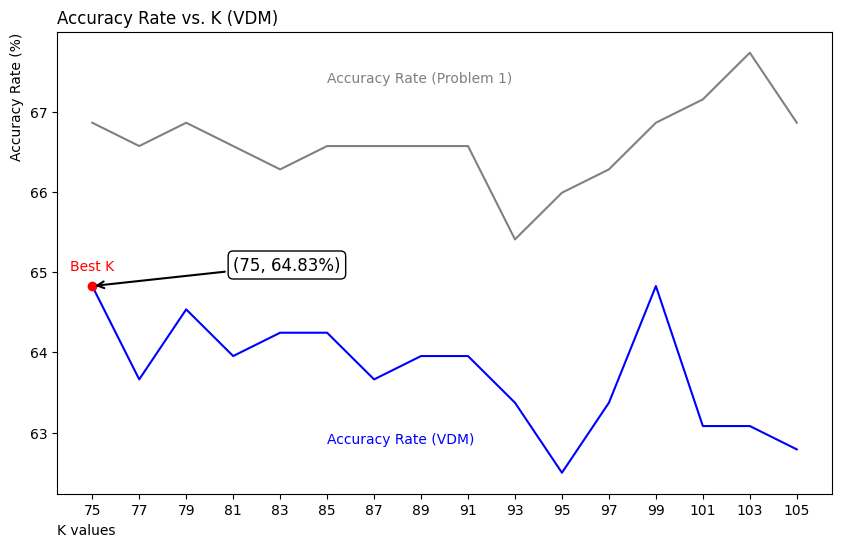

In [23]:
# Extract K values and accuracy rates
k_values_vdm = list(accuracy_results_vdm.keys())
accuracy_rate_vdm = [value * 100 for value in accuracy_results_vdm.values()]

# Build the graphic
plt.figure(figsize=(10,6))
plt.plot(k_values_vdm, accuracy_rate_vdm, linestyle='-', color='blue', label="Accuracy Rate (VDM)")
plt.text(k_values_vdm[5], accuracy_rate_vdm[0]-2, "Accuracy Rate (VDM)", color="blue", fontsize=10, verticalalignment='bottom')

# We add the graphic of problem 1 to visualize the difference clearly
plt.plot(k_values, accuracy_rate, linestyle='-', color='grey', label="Accuracy Rate (Problem 1)")
plt.text(k_values_vdm[5], accuracy_rate_vdm[0]+2.5, "Accuracy Rate (Problem 1)", color="grey", fontsize=10, verticalalignment='bottom')

# Find best K and best accuracy rate
best_k_vdm = max(accuracy_results_vdm, key=accuracy_results_vdm.get)
best_accuracy_vdm = accuracy_results_vdm[best_k_vdm] * 100

# Show the point in the graphic
plt.scatter(best_k_vdm, best_accuracy_vdm, color='red', zorder=3, label=f"Best K (VDM)= {best_k_vdm}")
plt.annotate(f"({best_k_vdm}, {best_accuracy_vdm:.2f}%)", 
             xy=(best_k_vdm, best_accuracy_vdm), 
             xytext=(best_k_vdm+6, best_accuracy_vdm+0.2),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5),
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))
plt.text(best_k_vdm, best_accuracy_vdm+0.2, "Best K", ha="center", fontsize=10, color="red")


# Graphic design
plt.title("Accuracy Rate vs. K (VDM)", loc='left')
plt.xlabel("K values", loc='left')
plt.ylabel("Accuracy Rate (%)", loc='top')
plt.xticks(k_values_vdm)

plt.show()

5. (5 points) What did your best model predict for the 100th
, 200th, and
300th test points?

In [24]:
# We make the predictions using k=75 as the value of k that gives us the best accuracy rate (64.83%)
k = best_k_vdm
rows = [100, 200, 300]

for i in rows:
    test_point_num = X_test_vdm[i-1]
    test_point_cat = X_test_cat[i-1]
    y_pred_vdm = knn_with_vdm(X_train_vdm, test_point_num, X_train_cat, test_point_cat, Y_train_vdm, k, vdm_distances)
    print(f"The prediction for the {i}th test point is {y_pred_vdm}")


The prediction for the 100th test point is 0
The prediction for the 200th test point is 0
The prediction for the 300th test point is 0


## Problem 3 (15 points)
Given the function f (x) = x2 + 6x:

1. Use derivative of f (x) to find the value of x that minimizes this function.
(2 points)

In [25]:
# Having y = x**2 + 6*x, y' = 2*x + 6
# We can say that x = sqrt(y - 6*x), x = (y_der - 6) / 2
def y(x):
    y = x**2 + 6*x
    return y

def x_min(y_der):
    x_min = (y_der - 6) / 2
    return x_min

# We equal y' to 0 to obtain x

x_min = x_min(0)        # Having y'' = 2 > 0 we can say that x_min is the value that minimizes the function

print(f"The value of x that minimizes the function is {x_min}, with y = {y(x_min)}")


The value of x that minimizes the function is -3.0, with y = -9.0


2. Use gradient descent to find the value of x that minimizes this function.
Compare your answer with the previous part. (13 points)

In [26]:
# We rewrite the y' in terms of x
def y_der(x):
    y = 2*x + 6
    return y

# We define the parameters
alpha = 0.1
x = np.random.randn()
tolerance = 1e-6
max_iter = 1000

# We use gradient descent
for i in range(max_iter):
    grad_desc = y_der(x)
    new_x = x - alpha*grad_desc
    if abs(new_x-x) < tolerance:
        break
    x = new_x

print(f"The new minimum is x = {x}, and y = {y(x)}")

The new minimum is x = -2.999995910215536, and y = -8.999999999983276


# Problem 4 (35 points)
The Space Shuttle Challenger disaster occurred on January 28, 1986, when it
broke apart 73 seconds into its flight, leading to the deaths of its seven crew
members. The spacecraft disintegrated over the Atlantic Ocean, off the coast
of central Florida at 11:38 EST. Disintegration of the entire vehicle began after
an O-ring seal in its right solid rocket booster failed at liftoff. Subsequently, a
special commission was appointed to investigate the accident. The commission
found that NASA disregarded warnings from engineers about the dangers of
launching posed by the low temperatures of that morning, claiming that en-
gineers could not provide a convincing argument against the launch (source:
Wikipedia, Applied Probability for Engineers).
File Oring.csv provides data on launch temperature and O-ring failure for
the 24-space shuttle launches prior to the Challenger disaster. There are six
O-rings used to seal field joints on the rocket motor assembly. A +1 in the
O-rings indicates that at least one O-ring failure had occurred on that launch
and a 0 indicates that no failure had occurred.

1. Normalize the launch temperature using the expression (x−µ)/σ . (3 points)

In [27]:
# We import the csv file
df_ORing = pd.read_csv("ORing.csv")
df_ORing["Temp Normalized"] = None     # we include a column in the dataframe to store the temperature normalized

mu = np.mean(df_ORing["Temp"])        # mu is the mean of the temperature
sigma = np.std(df_ORing["Temp"])      # sigma is the standard deviation of the temperature
for i in range(len(df_ORing["Temp"])):
    x_norm = (df_ORing.loc[i, "Temp"] - mu) / sigma    # x_norm is the temperature normalized using the expression (x−µ)/σ
    df_ORing.loc[i, "Temp Normalized"] = x_norm        # we add the new temperature to the column Temp Normalized

df_ORing["Temp Normalized"] = df_ORing["Temp Normalized"].astype(float)
print(df_ORing)

    Temp  Failure  Temp Normalized
0     53        1        -2.342325
1     56        1        -1.926937
2     57        1        -1.788475
3     63        0        -0.957699
4     66        0        -0.542312
5     67        0        -0.403849
6     67        0        -0.403849
7     67        0        -0.403849
8     68        0        -0.265387
9     69        0        -0.126924
10    70        0         0.011539
11    70        1         0.011539
12    70        1         0.011539
13    70        1         0.011539
14    72        0         0.288464
15    73        0         0.426926
16    75        0         0.703851
17    75        1         0.703851
18    76        0         0.842314
19    76        0         0.842314
20    78        0         1.119239
21    79        0         1.257702
22    80        0         1.396164
23    81        0         1.534627


2. Create a logistic regression model using the gradient decent technique to
predict the probability of O-ring failure based on the launch temperature.
Provide the equation for your model. You can NOT use built-in packages
for this problem. (20 points)

In [28]:
import math
# We make the hypothesis function
def h(z):
    return 1 / (1 + np.pow(math.e, -z)) 

# We make the function to implement logistic regression using gradient descent
def logistic_regression(x, y, alpha=0.01, max_iter=10000):
    m, n = x.shape
    w = np.zeros(n)  # We initialize the weight
    for i in range(max_iter):
        z = np.dot(x, w) 
        predictions = h(z) 
        gradient = np.dot(x.T, (predictions - y)) / m
        w -= alpha * gradient  # Corrected weight update
    return w

x = np.c_[np.ones(df_ORing.shape[0]), df_ORing["Temp Normalized"]]
y = df_ORing["Failure"].values

# Train logistic regression model
w = logistic_regression(x, y)
print(f"The value of the weight we obtained is w0: {w[0]:.4f} and w1: {w[1]:.4f}", "\n")

# We make a function to predict the values of y
def predict(x, w):
    predictions = []
    for value in x:
        value = np.array([1, value])  # We add a column with ones to multiply with the s
        y_pred = h(np.dot(w, value))
        predictions.append(1 if y_pred >= 0.5 else 0)
    return predictions

# We add a column to store the values predicted for y
df_ORing["Failure Predicted"] = None

x = df_ORing["Temp Normalized"]
predictions = predict(x, w)
for i in range(len(df_ORing)):
    df_ORing.loc[i, "Failure Predicted"] = predictions[i]
    
df_ORing["Failure Predicted"] = df_ORing["Failure Predicted"].astype(int)   # We convert the values to integers

print(df_ORing)


The value of the weight we obtained is w0: -1.1028 and w1: -1.2373 

    Temp  Failure  Temp Normalized  Failure Predicted
0     53        1        -2.342325                  1
1     56        1        -1.926937                  1
2     57        1        -1.788475                  1
3     63        0        -0.957699                  1
4     66        0        -0.542312                  0
5     67        0        -0.403849                  0
6     67        0        -0.403849                  0
7     67        0        -0.403849                  0
8     68        0        -0.265387                  0
9     69        0        -0.126924                  0
10    70        0         0.011539                  0
11    70        1         0.011539                  0
12    70        1         0.011539                  0
13    70        1         0.011539                  0
14    72        0         0.288464                  0
15    73        0         0.426926                  0
16    75     

3. Provide a plot of the original data along with your logistic model. (5
points)

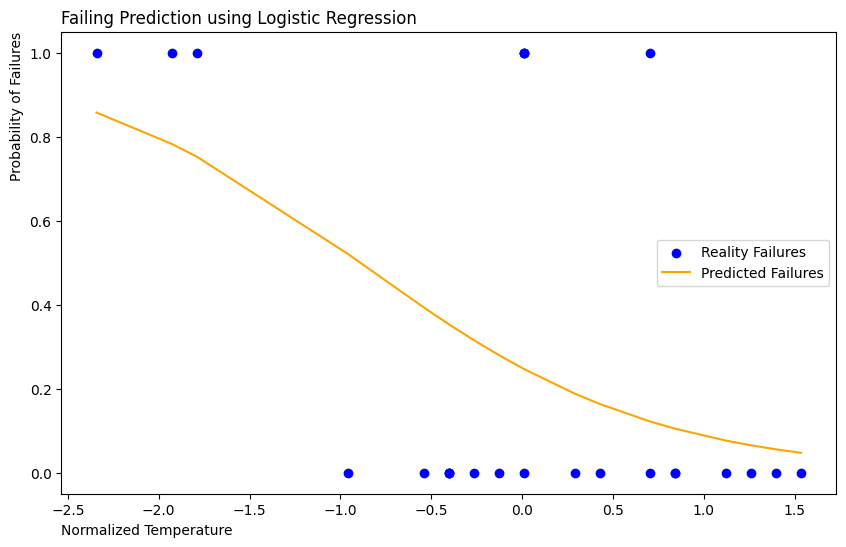

In [29]:
# Extract x and y values
x = df_ORing["Temp Normalized"]
y = h(w[0] + w[1]*x)

# Build the graphic
plt.figure(figsize=(10,6))
plt.scatter(df_ORing["Temp Normalized"], df_ORing["Failure"], color='blue', label='Reality Failures')
plt.plot(x, y, linestyle='-', color='orange', label="Predicted Failures")

# Graphic design
plt.title("Failing Prediction using Logistic Regression", loc='left')
plt.xlabel("Normalized Temperature", loc='left')
plt.ylabel("Probability of Failures", loc='top')
plt.legend(loc=5)

plt.show()

4. The actual temperature at the Challenger launch was 31 degrees Fahren-
heit. According to your model what was the probability of O-ring failure
on the Challenger launch? Could the engineers have used your model to
provide a convincing argument to NASA? Elaborate. (7 points)

In [30]:
# We try our model with the specific value of x
x = 31
x_norm = (x - mu) / sigma
prob_of_failure = h(w[0] + w[1]*x_norm)

if prob_of_failure>=0.5:
    print(f"As the probability of failure that we obtained is {prob_of_failure*100:.2f}% the engineers could have used our model to provide a convincing argument to Nasa against lunching the Challenger")
else:
    print(f"As the probability of failure that we obtained is {prob_of_failure*100:.2f}% the engineers could not have used our model to provide a convincing argument to Nasa against lunching the Challenger")

As the probability of failure that we obtained is 99.62% the engineers could have used our model to provide a convincing argument to Nasa against lunching the Challenger
